In [152]:
from tqdm import tqdm_notebook as tqdm # Module for tracking progress. conda install -c conda-forge tqdm
import json
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import json
from afinn import Afinn
import seaborn as sns

df = pd.read_csv (r'C:\Users\Saxen\Documents\Polit\Social Data Science\Trustpilot\Trustpilot_data.csv')
df.head()

,Unnamed: 0,website,name,review,rating
0,0,WWW.SAXO.COM,INGRID NIELSEN,Fin betjening,5 stjerner: Fremragende
1,1,WWW.SAXO.COM,Casper Sand Christiansen,God oplevelse - hver eneste gang!,5 stjerner: Fremragende
2,2,WWW.SAXO.COM,Gitte Zankl Høyer,Det var nemt at bestille og leveringen var vir...,5 stjerner: Fremragende
3,3,WWW.SAXO.COM,Anna Olesen,Nemt at bestille og hurtig levering. Har besti...,5 stjerner: Fremragende
4,4,WWW.SAXO.COM,Elisabeth RAVN,Har I mange år købt den ene dejlige oplevelse ...,5 stjerner: Fremragende


In [153]:
df['rating_n'] = df['rating'].str.extract('(\d+)')

In [155]:
df_cc = pd.DataFrame(df.name.str.split(' ',1).tolist(), columns = ['first_name','surname'])

df['first_name'] = df_cc['first_name']
df['surname'] = df_cc['surname']
df.head()
column_names =['website', 'first_name', 'surname', 'name', 'review', 'rating', 'rating_n']
df=df[column_names]
df.head()
df.count()

website       19985
first_name    19985
surname       13525
name          19985
review        19985
rating        19985
rating_n      19985
dtype: int64

In [156]:
df['first_name'] = df['first_name'].str.lower()

In [157]:
df_names = pd.read_excel (r'/Users/Saxen/Documents/Polit/Social Data Science/Trustpilot/Navne.xlsx')
# d for dreng, p for pige og u for unisex


In [158]:
df_names['first_name'] = df_names['first_name'].str.lower()

In [159]:
df_names2 = pd.merge(df, df_names, on='first_name', how='left')

In [160]:
#Finds the number of male and female names
print('Males: ' + str(sum(df_names2.Gender == 'd')),'\n', 'Females: ' + str(sum(df_names2.Gender == 'p')))

Males: 8246 
 Females: 9725


In [161]:
df_names2.count()



website       19985
first_name    19985
surname       13525
name          19985
review        19985
rating        19985
rating_n      19985
Gender        17971
dtype: int64

In [162]:
#df_names2.head()
del df_names2['rating']
del df_names2['name']
#df_names2['review'] = df_names2['review'].str.lower()

In [163]:
df_names2.head()

,website,first_name,surname,review,rating_n,Gender
0,WWW.SAXO.COM,ingrid,NIELSEN,Fin betjening,5,p
1,WWW.SAXO.COM,casper,Sand Christiansen,God oplevelse - hver eneste gang!,5,d
2,WWW.SAXO.COM,gitte,Zankl Høyer,Det var nemt at bestille og leveringen var vir...,5,p
3,WWW.SAXO.COM,anna,Olesen,Nemt at bestille og hurtig levering. Har besti...,5,p
4,WWW.SAXO.COM,elisabeth,RAVN,Har I mange år købt den ene dejlige oplevelse ...,5,p


In [165]:
#Original Afinn ordbog
afinn = Afinn(language='da',emoticons=True)

df_Afinn = df_names2
df_Afinn['Afinn'] = df_Afinn.review.apply(afinn.score)

df_Afinn.head(10)



,website,first_name,surname,review,rating_n,Gender,Afinn
0,WWW.SAXO.COM,ingrid,NIELSEN,Fin betjening,5,p,2.0
1,WWW.SAXO.COM,casper,Sand Christiansen,God oplevelse - hver eneste gang!,5,d,3.0
2,WWW.SAXO.COM,gitte,Zankl Høyer,Det var nemt at bestille og leveringen var vir...,5,p,5.0
3,WWW.SAXO.COM,anna,Olesen,Nemt at bestille og hurtig levering. Har besti...,5,p,2.0
4,WWW.SAXO.COM,elisabeth,RAVN,Har I mange år købt den ene dejlige oplevelse ...,5,p,0.0
5,WWW.SAXO.COM,kirsten,Kraglund,"Hurtig ekspedition, god pris, pæn bog.",5,p,7.0
6,WWW.SAXO.COM,kirsten,C Baatrup,"Fantastisk velskrevet og oplysende bog "" Livet...",5,p,4.0
7,WWW.SAXO.COM,henning,Jensen,Egentlig en alm. god handel. MEN Saxo skjuler ...,2,d,7.0
8,WWW.SAXO.COM,anders,None,Jeg bestilte og fik det leveret til tiden. Ene...,5,d,2.0
9,WWW.SAXO.COM,karina,None,"God service, og forholdsvis hurtig levering. M...",1,p,4.0


In [166]:
def word_count(text_string):
    return len(text_string.split())

In [167]:
df_Afinn['word count'] = df_Afinn['review'].apply(word_count)
df_Afinn['relativ_afinn'] = df_Afinn['Afinn'] / df_Afinn['word count']*100
df_Afinn.head()

,website,first_name,surname,review,rating_n,Gender,Afinn,word count,relativ_afinn
0,WWW.SAXO.COM,ingrid,NIELSEN,Fin betjening,5,p,2.0,2,100.000000
1,WWW.SAXO.COM,casper,Sand Christiansen,God oplevelse - hver eneste gang!,5,d,3.0,6,50.000000
2,WWW.SAXO.COM,gitte,Zankl Høyer,Det var nemt at bestille og leveringen var vir...,5,p,5.0,12,41.666667
3,WWW.SAXO.COM,anna,Olesen,Nemt at bestille og hurtig levering. Har besti...,5,p,2.0,17,11.764706
4,WWW.SAXO.COM,elisabeth,RAVN,Har I mange år købt den ene dejlige oplevelse ...,5,p,0.0,22,0.000000


C:\Users\Saxen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Saxen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Saxen\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


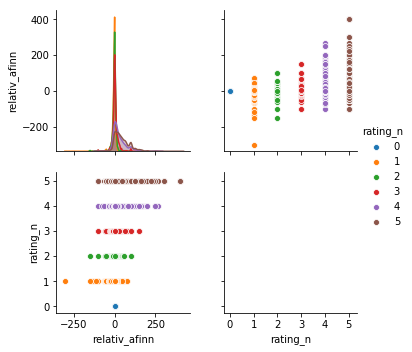

In [168]:
#Original Afinn
# define columns
sentiment_columns = ['relativ_afinn']
hue = 'rating_n'
sns.pairplot(df_Afinn.sample(10000)[['relativ_afinn']+[hue]], hue=hue)

#sns.set(color_codes=True)
#g = sns.pairplot()
#sns.set(color_codes=True)
#g= sns.pairplot(iris, hue="species",  palette="husl",diag_kws=dict(shade=False) )

In [169]:
# For at få den justerede Afinn ordbog til at virke, så skal man sætte indholdet fra den justerede ordbog ind i den originale
#og herefter køre nedstående kode. For at få den originale ordbog tilbage, så skal man igen ombytte filerne og køre koden igen.
afinn = Afinn(language='da',emoticons=True)

df_Afinn = df_names2
df_Afinn['Afinn_adj'] = df_Afinn.review.apply(afinn.score)

df_Afinn['relativ_afinn_adj'] = df_Afinn['Afinn_adj'] / df_Afinn['word count']*100

df_Afinn.head()

,website,first_name,surname,review,rating_n,Gender,Afinn,word count,relativ_afinn,Afinn_adj,relativ_afinn_adj
0,WWW.SAXO.COM,ingrid,NIELSEN,Fin betjening,5,p,2.0,2,100.000000,4.0,200.000000
1,WWW.SAXO.COM,casper,Sand Christiansen,God oplevelse - hver eneste gang!,5,d,3.0,6,50.000000,9.0,150.000000
2,WWW.SAXO.COM,gitte,Zankl Høyer,Det var nemt at bestille og leveringen var vir...,5,p,5.0,12,41.666667,14.0,116.666667
3,WWW.SAXO.COM,anna,Olesen,Nemt at bestille og hurtig levering. Har besti...,5,p,2.0,17,11.764706,5.0,29.411765
4,WWW.SAXO.COM,elisabeth,RAVN,Har I mange år købt den ene dejlige oplevelse ...,5,p,0.0,22,0.000000,0.0,0.000000


C:\Users\Saxen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Saxen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Saxen\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


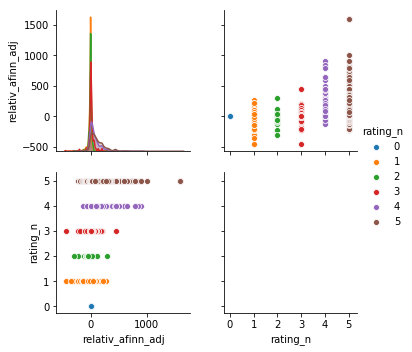

In [170]:
#define columns
sentiment_columns = ['relativ_afinn_adj']
hue = 'rating_n'
sns.pairplot(df_Afinn.sample(10000)[['relativ_afinn_adj']+[hue]], hue=hue)

#sns.set(color_codes=True)
#g = sns.pairplot()
#sns.set(color_codes=True)
#g= sns.pairplot(iris, hue="species",  palette="husl",diag_kws=dict(shade=False) )

In [171]:
#Antal NaN i gender
df_Afinn.isnull()
df_Afinn.isnull().sum()

website                 0
first_name              0
surname              6460
review                  0
rating_n                0
Gender               2014
Afinn                   0
word count              0
relativ_afinn           0
Afinn_adj               0
relativ_afinn_adj       0
dtype: int64

In [172]:
#Laver en kolonne til at tælle store bogstaver og exclamatins
def uppercase(text_string):
    upper_w = 0
    for word in text_string.split():
        upper_w += word.isupper()
    return upper_w

df_Afinn['upper_words'] = df_Afinn['review'].apply(uppercase)

def exclamation_n(text_string):
    exclamation = 0
    for rev in text_string:
        exclamation = len(re.findall('!', text_string))
    return exclamation
df_Afinn['exclamation'] = df_Afinn['review'].apply(exclamation_n)

def dotdotdot(text_string):
    dotdotdot_count = 0
    for rev in text_string:
        dotdotdot_count = len(re.findall('\.\.\.', text_string))
    return dotdotdot_count

df_Afinn['dot'] = df_Afinn['review'].apply(dotdotdot)

cuss_list = ['fuck', 'Fuck', 'FUCK', 'fucking', 'Fucking', 'FUCKING', 'f\*\*\*', 'f\*\*\*ing', 'F\*\*\*', 'F\*\*\*ing', 'f\.\.\.', 'F\.\.\.', 'f\.\.\.ing', 'F\.\.\.ing', 'lort', 'Lort', 'LORT', 'lorte', 'Lorte', 'LORTE', 'l\*\*t', 'L\*\*t', 'l\*\*\*', 'L\*\*\*', 'L\.\.t', 'l\.\.t', 'l\.\.\.', 'L\.\.\.', 'l\*\*te', 'L\*\*te', 'l\*\*\*e', 'L\*\*\*e', 'L\.\.te', 'l\.\.te']

def cuss_words(text_string):
    cuss = 0
    for cuss_word in cuss_list:
        cuss = len(re.findall(cuss_word, text_string))
    return cuss
df_Afinn['cuss'] = df_Afinn['review'].apply(cuss_words)

def excl_DSB(text_string):
    for x in text_string:
        no_dsb = text_string.replace('DSB', '')
    return no_dsb

df_Afinn['no_DSB_review'] = df_Afinn['review'].apply(excl_DSB)

df_Afinn.sample(10)

,website,first_name,surname,review,rating_n,Gender,Afinn,word count,relativ_afinn,Afinn_adj,relativ_afinn_adj,upper_words,exclamation,dot,cuss,no_DSB_review
8714,SHOPPING.COOP.DK,laila,None,"Varen kom som den skulle , men det er ikke let...",3,p,3.0,39,7.692308,5.0,12.820513,0,0,0,0,"Varen kom som den skulle , men det er ikke let..."
12545,WWW.WUPTI.COM,samira,Daanoune,Mit råd til alle dem der tænker at køb hvideva...,1,p,-9.0,222,-4.054054,-21.0,-9.459459,0,0,7,0,Mit råd til alle dem der tænker at køb hvideva...
17783,SWEETDEAL.DK,lene,None,Har altid været rigtig glad for mine handler,5,p,3.0,8,37.500000,9.0,112.500000,0,0,0,0,Har altid været rigtig glad for mine handler
12759,WWW.WUPTI.COM,grethe,væggemose,DET VAR EN GOD OPLEVELSE,5,p,3.0,5,60.000000,9.0,180.000000,5,0,0,0,DET VAR EN GOD OPLEVELSE
4115,WWW.NEMLIG.COM,connie,None,God kundeservice og ved aflevering af varer fl...,5,p,3.0,11,27.272727,9.0,81.818182,0,0,0,0,God kundeservice og ved aflevering af varer fl...
16867,SWEETDEAL.DK,anita,Johnsen,"Nem handel, som altid :-)",5,p,2.0,5,40.000000,3.0,60.000000,0,0,0,0,"Nem handel, som altid :-)"
14608,WWW.BOOZT.COM,alice,haunstrup,"Super hurtig med levering, men lang tid om at ...",4,p,5.0,11,45.454545,13.0,118.181818,0,0,0,0,"Super hurtig med levering, men lang tid om at ..."
9115,SHOPPING.COOP.DK,kunde,None,Rigtig god og hurtig,5,NaN,5.0,4,125.000000,13.0,325.000000,0,0,0,0,Rigtig god og hurtig
10474,WWW.DSB.DK,karsten,Olesen,Parkerer 9. december i P-kælderen ved statione...,1,d,3.0,167,1.796407,5.0,2.994012,5,0,0,0,Parkerer 9. december i P-kælderen ved statione...
15549,WWW.BOOZT.COM,annette,Faber,Lynhurtig 👍,5,p,0.0,2,0.000000,0.0,0.000000,0,0,0,0,Lynhurtig 👍


In [173]:
#Dataframe med Gender=d
sort_male = df_Afinn['Gender']== 'd'

df_sort_male = df_Afinn[sort_male]
print(df_sort_male.shape)
df_sort_male.head()

(8246, 16)


,website,first_name,surname,review,rating_n,Gender,Afinn,word count,relativ_afinn,Afinn_adj,relativ_afinn_adj,upper_words,exclamation,dot,cuss,no_DSB_review
1,WWW.SAXO.COM,casper,Sand Christiansen,God oplevelse - hver eneste gang!,5,d,3.0,6,50.000000,9.0,150.000000,0,1,0,0,God oplevelse - hver eneste gang!
7,WWW.SAXO.COM,henning,Jensen,Egentlig en alm. god handel. MEN Saxo skjuler ...,2,d,7.0,61,11.475410,11.0,18.032787,1,0,0,0,Egentlig en alm. god handel. MEN Saxo skjuler ...
8,WWW.SAXO.COM,anders,None,Jeg bestilte og fik det leveret til tiden. Ene...,5,d,2.0,30,6.666667,4.0,13.333333,0,0,0,0,Jeg bestilte og fik det leveret til tiden. Ene...
10,WWW.SAXO.COM,orla,Krause,god betjening,5,d,3.0,2,150.000000,9.0,450.000000,0,0,0,0,god betjening
11,WWW.SAXO.COM,lucas,Andersen,Hurtig levering og udemærkede priser. Kan godt...,4,d,7.0,8,87.500000,17.0,212.500000,0,0,0,0,Hurtig levering og udemærkede priser. Kan godt...


In [174]:
#Dataframe med Gender=p
sort_female = df_Afinn['Gender']== 'p'

df_sort_female = df_Afinn[sort_female]
print(df_sort_female.shape)
df_sort_female.head()

(9725, 16)


,website,first_name,surname,review,rating_n,Gender,Afinn,word count,relativ_afinn,Afinn_adj,relativ_afinn_adj,upper_words,exclamation,dot,cuss,no_DSB_review
0,WWW.SAXO.COM,ingrid,NIELSEN,Fin betjening,5,p,2.0,2,100.000000,4.0,200.000000,0,0,0,0,Fin betjening
2,WWW.SAXO.COM,gitte,Zankl Høyer,Det var nemt at bestille og leveringen var vir...,5,p,5.0,12,41.666667,14.0,116.666667,0,0,0,0,Det var nemt at bestille og leveringen var vir...
3,WWW.SAXO.COM,anna,Olesen,Nemt at bestille og hurtig levering. Har besti...,5,p,2.0,17,11.764706,5.0,29.411765,0,0,0,0,Nemt at bestille og hurtig levering. Har besti...
4,WWW.SAXO.COM,elisabeth,RAVN,Har I mange år købt den ene dejlige oplevelse ...,5,p,0.0,22,0.000000,0.0,0.000000,1,0,0,0,Har I mange år købt den ene dejlige oplevelse ...
5,WWW.SAXO.COM,kirsten,Kraglund,"Hurtig ekspedition, god pris, pæn bog.",5,p,7.0,6,116.666667,17.0,283.333333,0,0,0,0,"Hurtig ekspedition, god pris, pæn bog."


In [175]:
#Antal NaN i gender
df_Afinn.isnull()
df_Afinn.isnull().sum()

website                 0
first_name              0
surname              6460
review                  0
rating_n                0
Gender               2014
Afinn                   0
word count              0
relativ_afinn           0
Afinn_adj               0
relativ_afinn_adj       0
upper_words             0
exclamation             0
dot                     0
cuss                    0
no_DSB_review           0
dtype: int64

In [176]:
#Original Afinn
df_Afinn.groupby(['Gender', 'rating_n'])['relativ_afinn'].describe()

count       mean        std    min        25%        50%  \
Gender rating_n                                                              
d      0            9.0   0.000000   0.000000    0.0   0.000000   0.000000   
       1         1913.0  -3.272401  15.964967 -300.0  -6.250000  -0.840336   
       2          467.0  -0.747615  14.942396 -150.0  -4.233871   0.000000   
       3          407.0   3.511021  19.058104 -150.0  -0.490196   1.666667   
       4         1096.0  29.797640  41.466663  -75.0   0.000000  15.384615   
       5         4354.0  44.873696  47.854689 -100.0   9.523810  33.333333   
p      0            3.0   0.000000   0.000000    0.0   0.000000   0.000000   
       1         1102.0  -2.351701  12.016229 -150.0  -5.434920  -0.624367   
       2          297.0  -0.040660   9.473389  -40.0  -3.428571   0.000000   
       3          387.0   6.225738  21.877883 -100.0   0.000000   2.608696   
       4         1206.0  30.872332  39.473128 -100.0   4.166667  17.647059   
       5         6730.0  47.501419  46.878383 -100.0  14.350649  36.363636   

                       75%         max  
Gender rating_n                         
d      0          0.000000    0.000000  
       1          2.197802  133.333333  
       2          3.802776  100.000000  
       3          7.921569  125.000000  
       4         45.454545  300.000000  
       5         66.666667  400.000000  
p      0          0.000000    0.000000  
       1          1.878057   80.000000  
       2          4.337900   57.142857  
       3          8.922056  150.000000  
       4         44.444444  250.000000  
       5         69.891304  400.000000

In [177]:
#adj Afinn
df_Afinn.groupby(['Gender', 'rating_n'])['relativ_afinn_adj'].describe()

count        mean         std    min        25%        50%  \
Gender rating_n                                                                
d      0            9.0    0.000000    0.000000    0.0   0.000000   0.000000   
       1         1913.0   -8.658164   38.478273 -450.0 -15.384615  -2.325581   
       2          467.0   -2.661200   40.666129 -450.0  -9.317829   0.000000   
       3          407.0   10.721060   48.468262 -450.0  -1.699309   4.761905   
       4         1096.0   80.760923  111.555149 -225.0   7.535377  42.857143   
       5         4354.0  119.493444  137.067923 -200.0  25.000000  81.250000   
p      0            3.0    0.000000    0.000000    0.0   0.000000   0.000000   
       1         1102.0   -7.035671   32.556395 -450.0 -13.446669  -2.083333   
       2          297.0   -0.815418   24.126236 -162.5  -8.648649   0.000000   
       3          387.0   16.336086   55.482801 -225.0   0.000000   6.896552   
       4         1206.0   78.386725  103.797267 -200.0  11.672078  42.857143   
       5         6730.0  124.208031  138.509062 -225.0  35.620375  88.888889   

                        75%          max  
Gender rating_n                           
d      0           0.000000     0.000000  
       1           4.315197   266.666667  
       2           7.592136   300.000000  
       3          20.000000   325.000000  
       4         114.285714   900.000000  
       5         180.000000  1600.000000  
p      0           0.000000     0.000000  
       1           3.272626   225.000000  
       2           9.389671   114.285714  
       3          25.000000   450.000000  
       4         109.226190   850.000000  
       5         180.000000  1600.000000